### HYPOTHESIS
1. The Item_MRP (Maximum Retail Price) has an impact on the Item_Outlet_Sales.
2. Outlet_Type has an impact on Item_Outlet_Sales.
3. The Item_Outlet_Sales are influenced by the Outlet_Location_Type.
4. Item_Type has an impact on Item_Outlet_Sales.
5. Outlet_Size has an impact on Item_Outlet_Sales.

1. Better priced things may experience fewer sales due to affordability concerns, 
   whilst lower priced items may experience better sales due to enhanced affordability and customer appeal.
2. Different types of outlets may attract different customer segments, resulting in variations in sales.
3. The location of the outlet may influence the spending power and preferences of local customers, hence influencing sales.
4. Customers health consciousness and dietary choices can influence their purchasing decisions, therefore items labelled "Low Fat" or "Regular" may have differing sales patterns.
5. Different types of products may have varying demand and popularity among customers, leading to differences in sales across item categories.

### Loading Packages and Data

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [223]:
#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


In [112]:
df_train = pd.read_csv(r"C:\Users\HP\Desktop\techocolab\mini project\9961_14084_bundle_archive\train.csv")
df_test = pd.read_csv(r"C:\Users\HP\Desktop\techocolab\mini project\9961_14084_bundle_archive\test.csv")

In [113]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [114]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [115]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [116]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [117]:
df_train.shape

(8523, 12)

In [118]:
df_test.shape

(5681, 11)

In [119]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [120]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [121]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [122]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [123]:
df_train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### Exploratory Data Analysis
- Handle Missing value
-  Removing duplicates
-  Outlier Treatment
- Normalizing and Scaling( Numerical Variables)
- Univariate Analysis
- Bivariate Analysis

### Handling Missing values

In [124]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [125]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [126]:
print("Outlet_Size:\n", df_train.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", df_train.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64 




In [127]:
print("Outlet_Size:\n", df_test.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", df_test.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64 


Item_Weight:
 10.500    57
17.600    53
15.600    48
20.250    47
19.350    46
          ..
6.980      1
6.320      1
5.465      1
5.945      1
7.670      1
Name: Item_Weight, Length: 410, dtype: int64 




### Imputation for missing value 

In [128]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace = True)

In [129]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace = True)

In [130]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace = True)

In [131]:
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace = True)

In [132]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [133]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [134]:
# check how many entries have 0
df_train['Item_Visibility'].value_counts().head()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
Name: Item_Visibility, dtype: int64

In [135]:
#we replace the 0 values for NAN values so the mean value is not affected.

In [136]:
 df_train['Item_Visibility'] = df_train['Item_Visibility'].replace({0:np.nan})

In [137]:
df_train['Item_Visibility'].head(10)

0    0.016047
1    0.019278
2    0.016760
3         NaN
4         NaN
5         NaN
6    0.012741
7    0.127470
8    0.016687
9    0.094450
Name: Item_Visibility, dtype: float64

In [138]:
# pivot table with the mean values that will be used to replace the nan values
df = df_train.pivot_table(values='Item_Visibility', index='Item_Type', columns='Outlet_Type', aggfunc='mean')
df

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.127519,0.066025,0.069763,0.063000
Breads,0.107172,0.066962,0.065450,0.057083
Breakfast,0.132249,0.080078,0.083165,0.065450
Canned,0.106142,0.067540,0.072232,0.062376
Dairy,0.122944,0.069374,0.070324,0.067568
Frozen Foods,0.107033,0.065310,0.063023,0.063515
Fruits and Vegetables,0.120401,0.067442,0.067224,0.066292
Hard Drinks,0.107030,0.066509,0.065995,0.060225
Health and Hygiene,0.095284,0.053916,0.051457,0.054353


In [139]:
# replace the nan values
# define function that returns the mean values
def find_mean(x):
    return df.loc[x['Item_Type'], x['Outlet_Type']]

# replace missing values in loan_amount with median values
df_train['Item_Visibility'].fillna(df_train[df_train['Item_Visibility'].isnull()].apply(find_mean, axis=1), inplace=True)

In [140]:
df_train['Item_Visibility'].head(10)

0    0.016047
1    0.019278
2    0.016760
3    0.120401
4    0.059544
5    0.069763
6    0.012741
7    0.127470
8    0.016687
9    0.094450
Name: Item_Visibility, dtype: float64

In [141]:
#list of all the numeric columns
num = df_train.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = df_train.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  df_train[num]
#categoric df
BM_cat = df_train[cat]

#print(num)
#print(cat)

[df_train[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

In [142]:
## check the unique data

In [143]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [144]:
df_train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [145]:
df_train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [146]:
df_train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
df_test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [147]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857645,4.226124,4.555000,9.310000,12.857645,16.000000,21.350000
Item_Visibility,8523.0,0.070440,0.048885,0.003575,0.033085,0.060700,0.096335,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290000,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800


In [148]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

### Handling Duplicate records

In [149]:
duplicate = df_train.duplicated()
print(duplicate.sum())
df_train[duplicate]

0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


### Handling outliers

<Axes: xlabel='Item_MRP'>

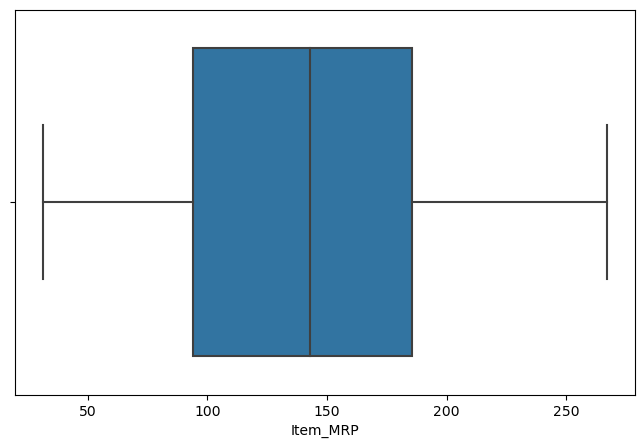

In [150]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_train['Item_MRP'])

<Axes: xlabel='Item_Weight'>

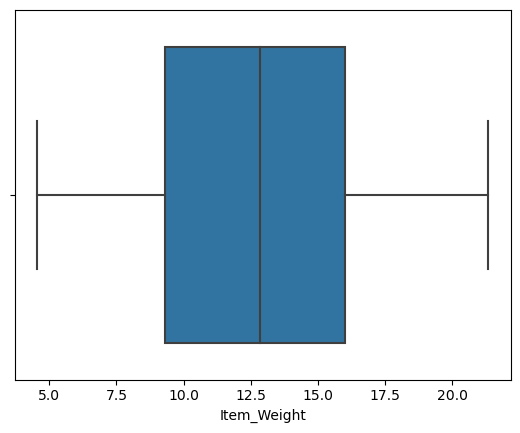

In [151]:
import seaborn as sns
plt.figure()
sns.boxplot(x=df_train['Item_Weight'])

In [152]:
## Outlet_Establishment_Year is quite useless as it is, making a new column with the age the new name will be Outlet_Age

In [153]:
#creating our new column for both datasets
df_train['Outlet_Age'], df_train['Outlet_Age']= df_train['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), df_train['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

## Data Visualization

### Univariate Analysis

#### Numerical data

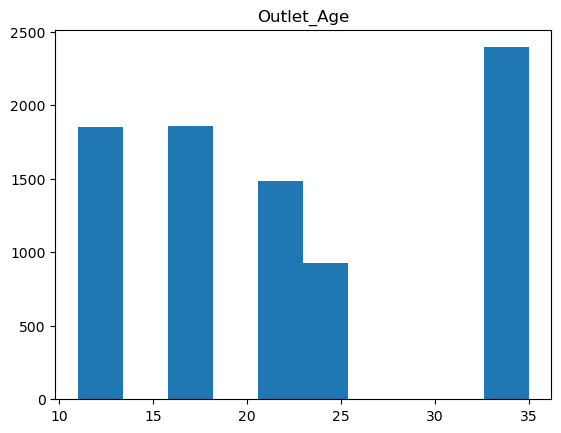

In [154]:
#list of all the numeric columns
num = df_train.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  df_train[num]

plt.hist(df_train['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

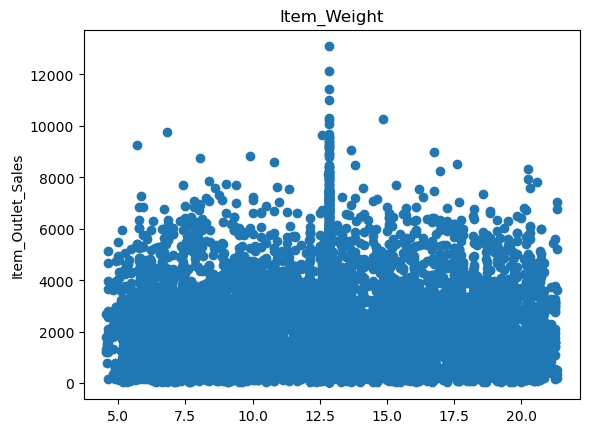

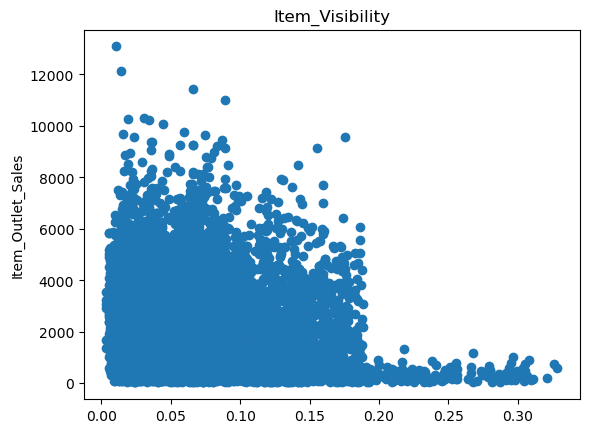

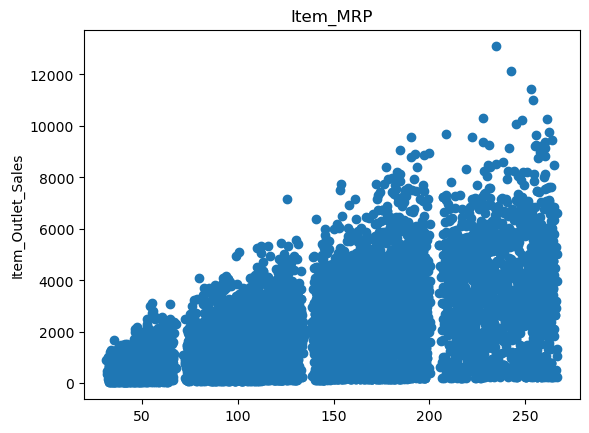

In [155]:
#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

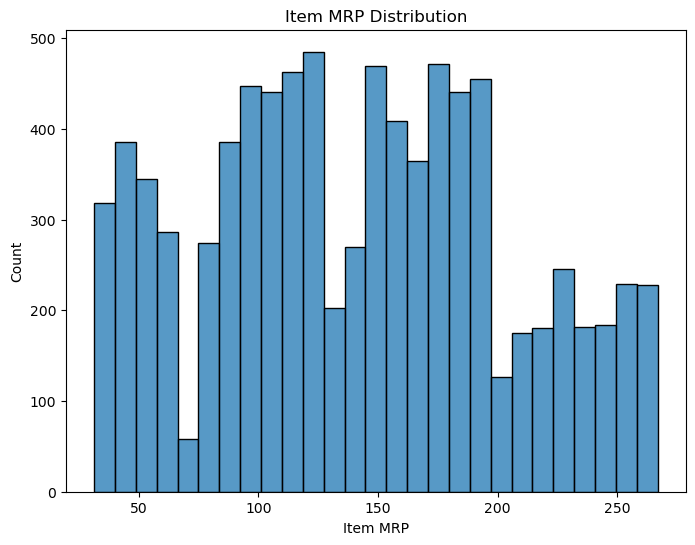

In [156]:
# Histogram of Item_MRP
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x="Item_MRP")
plt.title("Item MRP Distribution")
plt.xlabel("Item MRP")
plt.ylabel("Count")
plt.show()

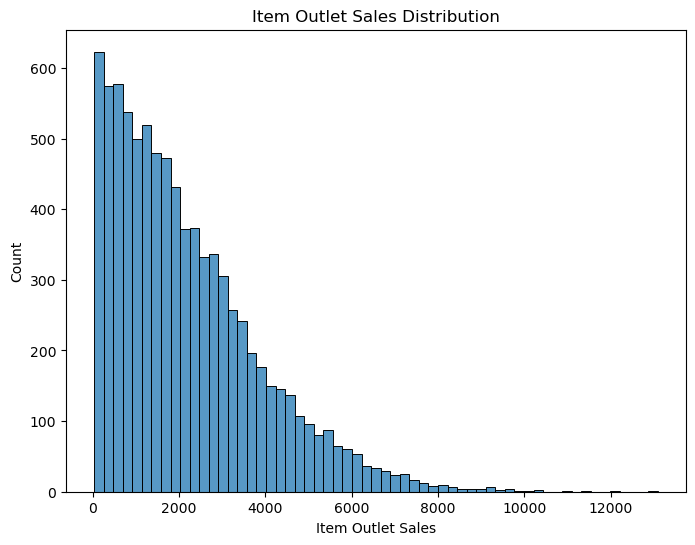

In [157]:
# Histogram of Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x="Item_Outlet_Sales")
plt.title("Item Outlet Sales Distribution")
plt.xlabel("Item Outlet Sales")
plt.ylabel("Count")
plt.show()

#### Categorical data

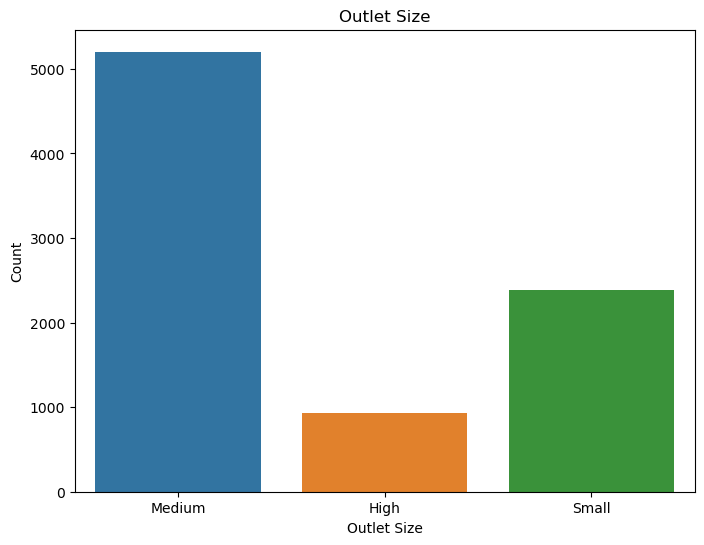

In [158]:
# Count plot of Outlet_Size
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x="Outlet_Size")
plt.title("Outlet Size")
plt.xlabel("Outlet Size")
plt.ylabel("Count")
plt.show()

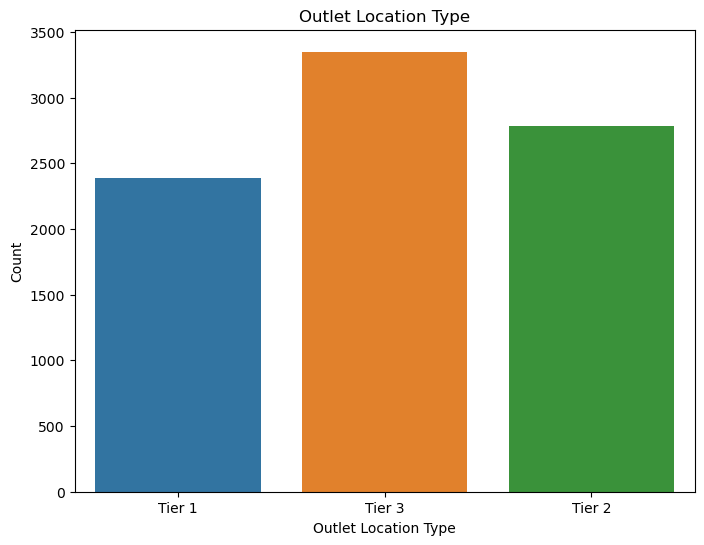

In [159]:
# Count plot of Outlet_Location_Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x="Outlet_Location_Type")
plt.title("Outlet Location Type")
plt.xlabel("Outlet Location Type")
plt.ylabel("Count")
plt.show()

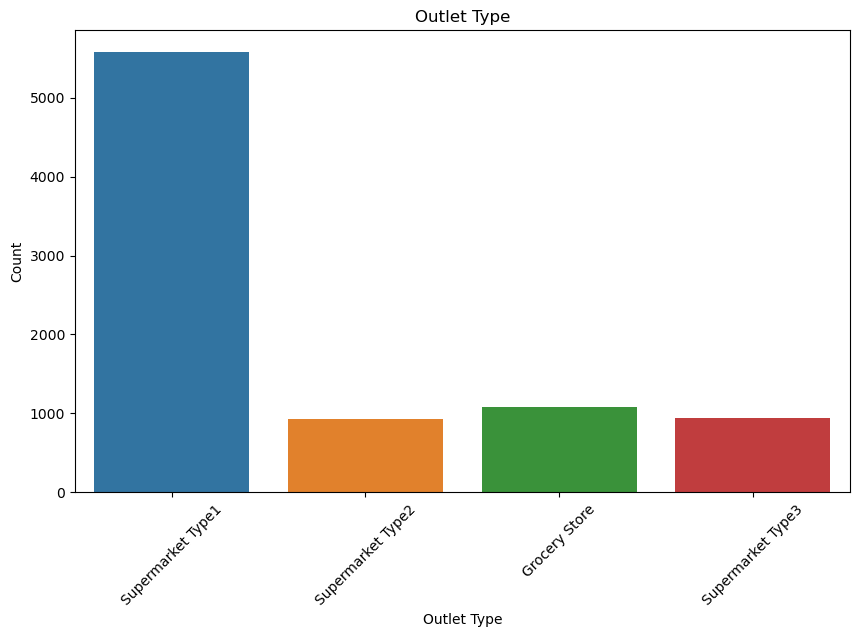

In [160]:
# Count plot of Outlet_Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x="Outlet_Type")
plt.title("Outlet Type")
plt.xlabel("Outlet Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

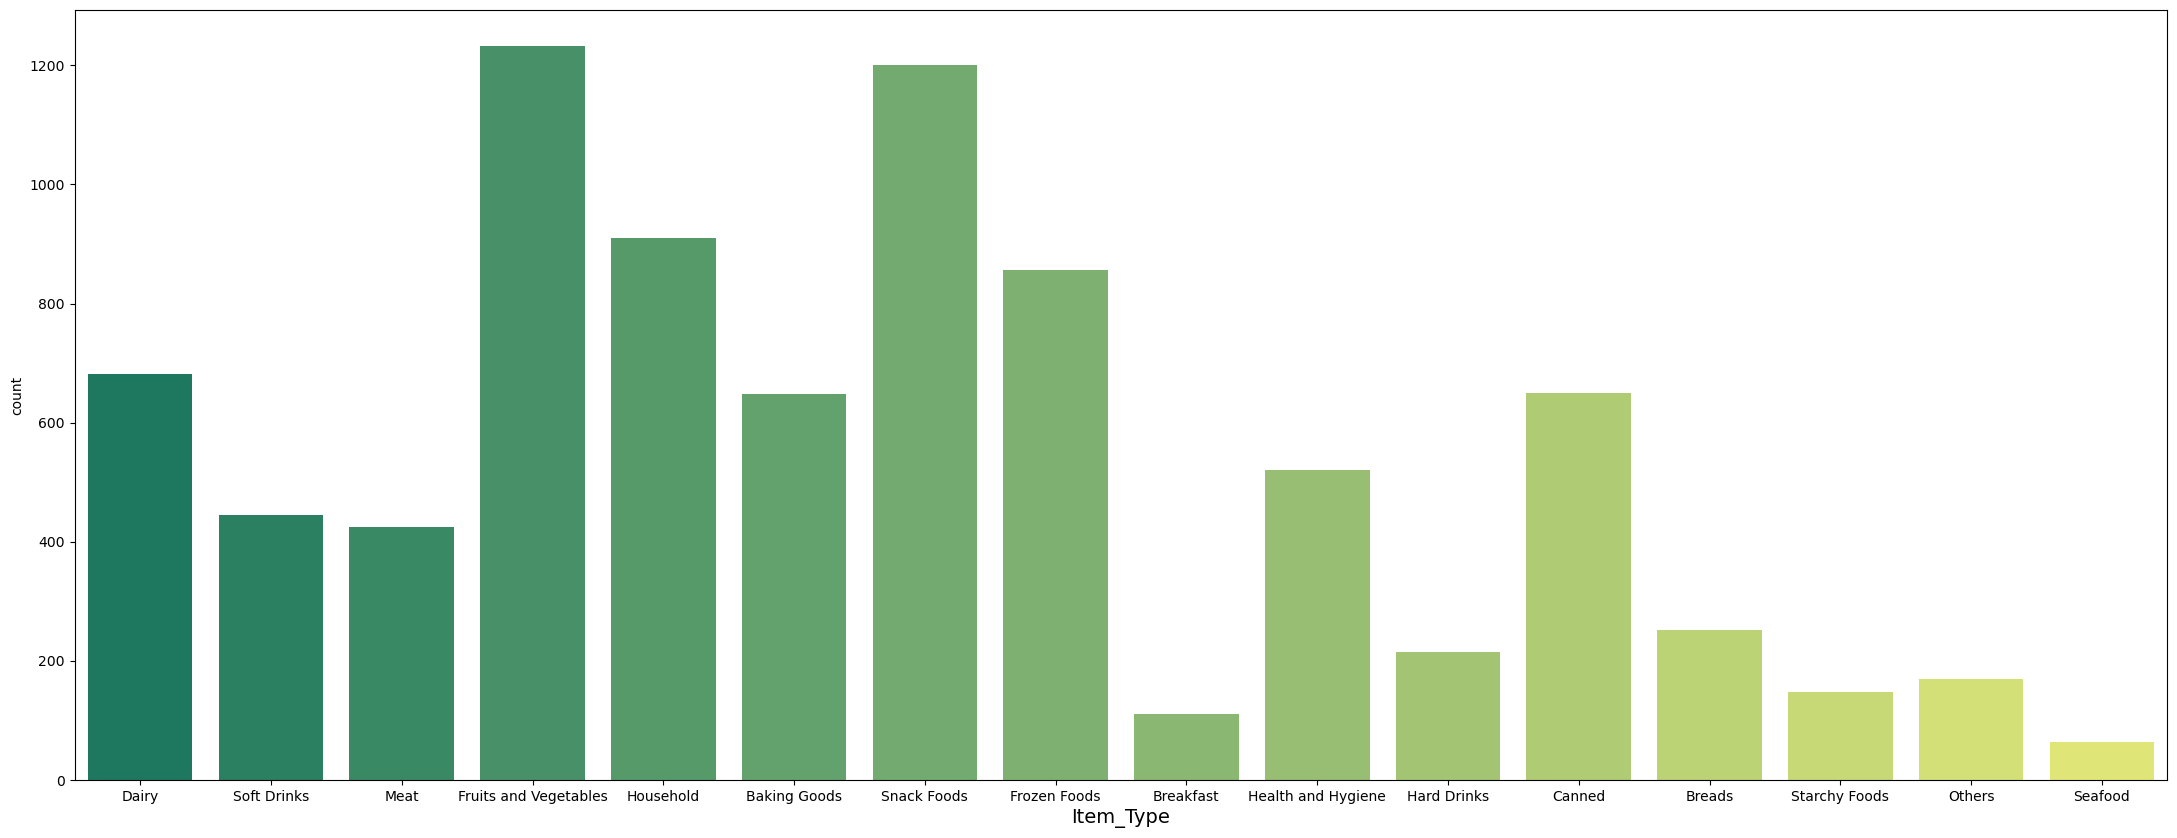

In [161]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=df_train ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

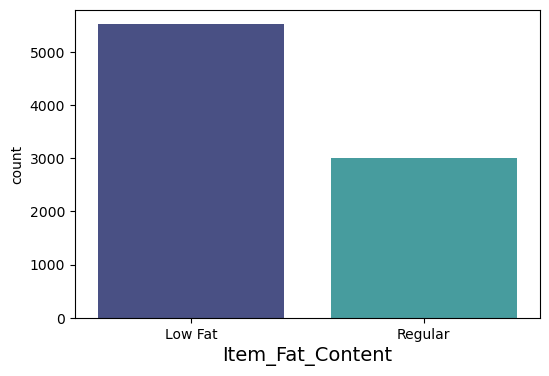

In [162]:
#categorical columns:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=df_train ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

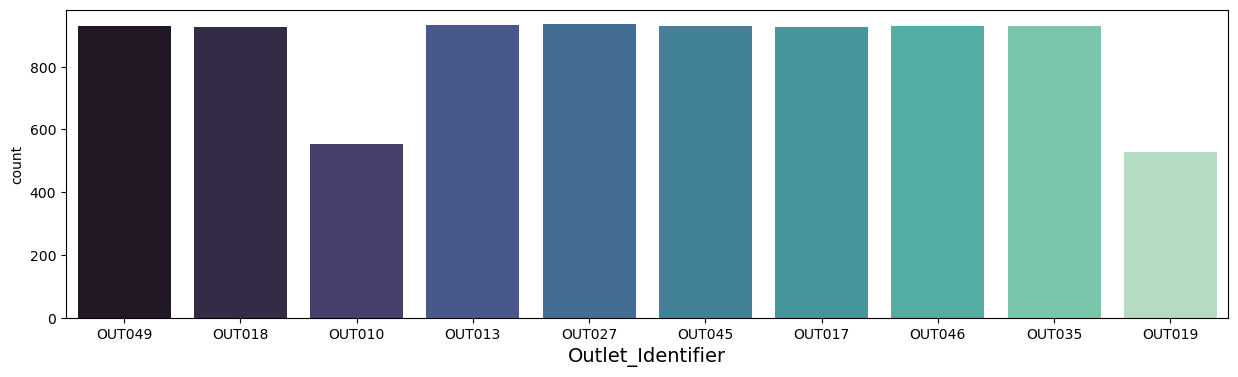

In [163]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=df_train ,palette='mako')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

#### numeric columns realizations
1. Outlet_Age - The most common outlets are 35 years old.
2. Item_Weight - The data is very spreaded, no specific pattern.
3. Item_Visibility - Appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are not selling well is some cases.
4. Item_MRP - Items with higher MRP tend to sell better in most cases.

#### Categoric columns realizations
1. Item_Fat_Content - Most items sold are low fat.
2. Item_Type - Item types that are distictly popular are fruits and vegetables and snack foods.
3. Outlet_Identifier - Sold items are ditributed evenly among outlets excluding OUT010 and OUT019 that are significanly lower.
4. Outlet_Size - Bigmart outlets are mostly medium sized in our data.
5. Outlet_Location_Type - The most common type is Tier3.
6. Outlet_Type - By a wide margin the mode outlet type is Supermarket Type1

### Multivariate Analysis

### I want to check the following relationships with Item_Outlet_Sales:

1. Sales per item type
2. Sales per outlet
3. Sales per outlet type
4. Sales per outlet size
5. Sales per location type
6. Sales per Item Weight

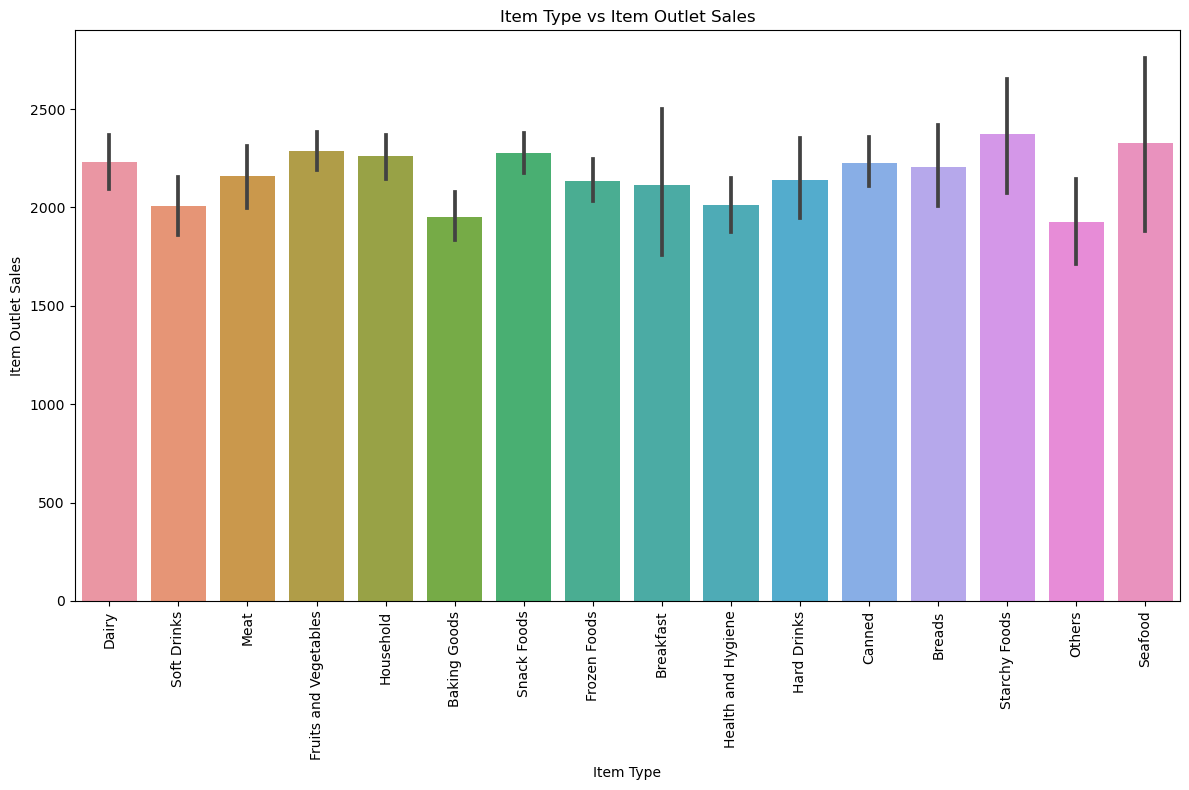

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(data=df_train, x="Item_Type", y="Item_Outlet_Sales")
plt.title("Item Type vs Item Outlet Sales")
plt.xlabel("Item Type")
plt.ylabel("Item Outlet Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


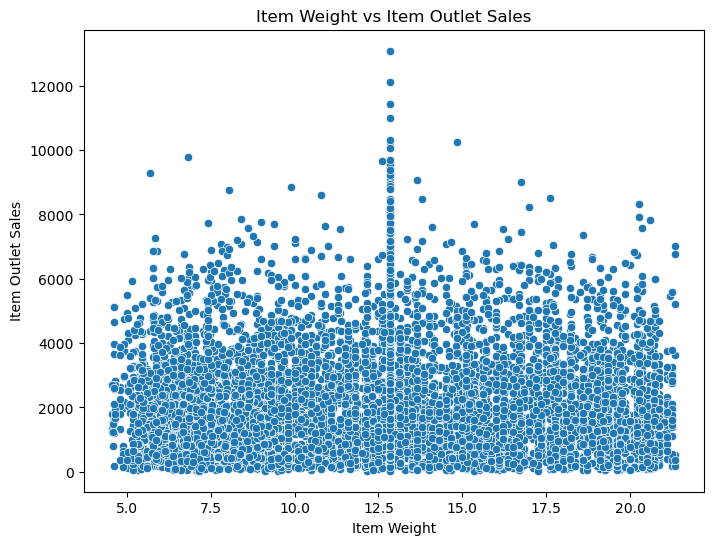

In [165]:
# Scatter plot of Item_Weight vs Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x="Item_Weight", y="Item_Outlet_Sales")
plt.title("Item Weight vs Item Outlet Sales")
plt.xlabel("Item Weight")
plt.ylabel("Item Outlet Sales")
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


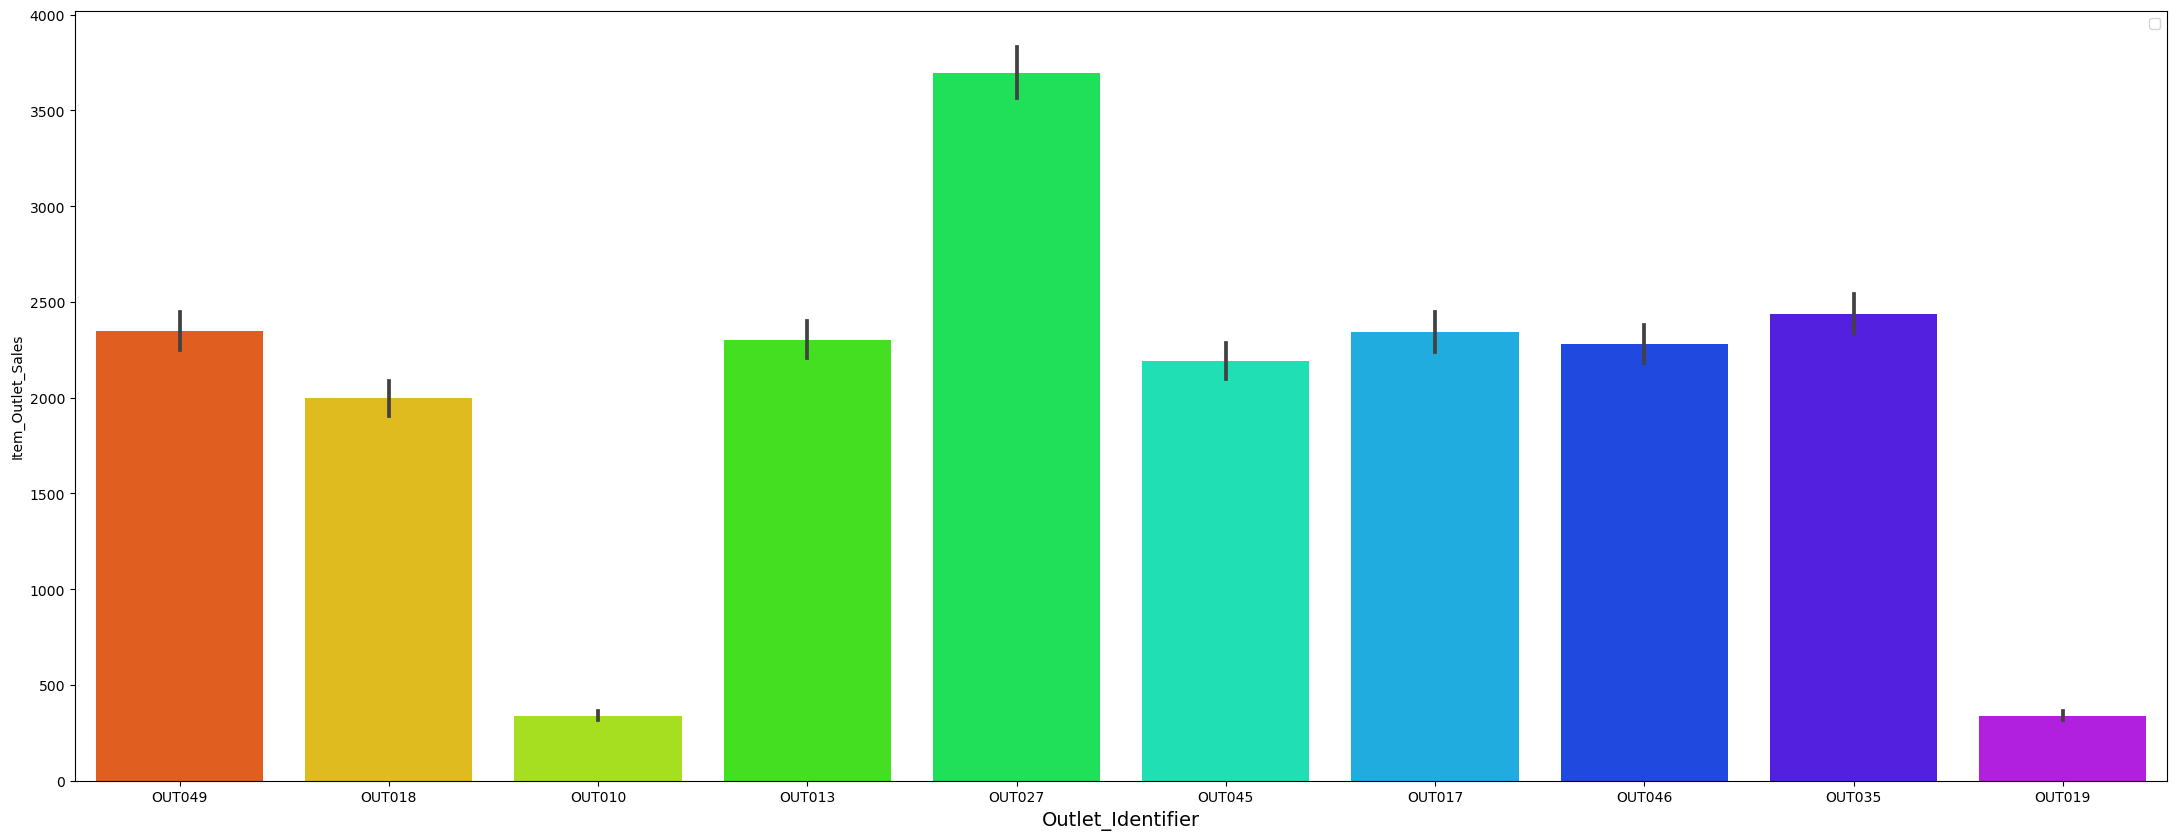

In [166]:
plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=df_train ,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


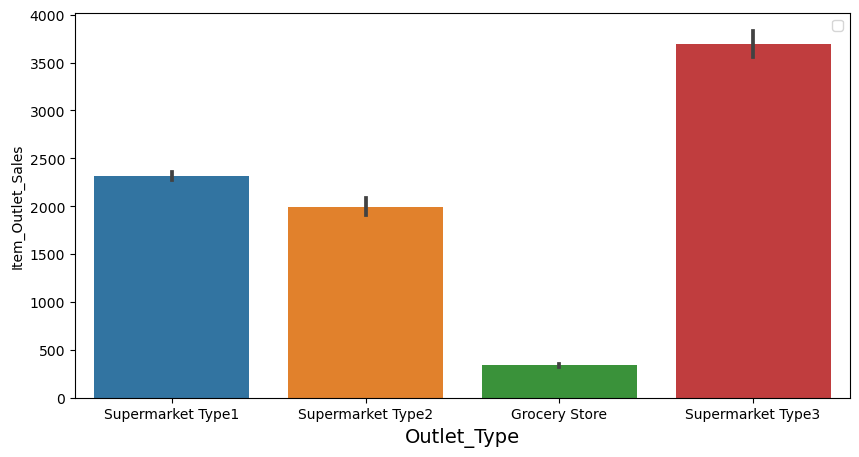

In [167]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=df_train)
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


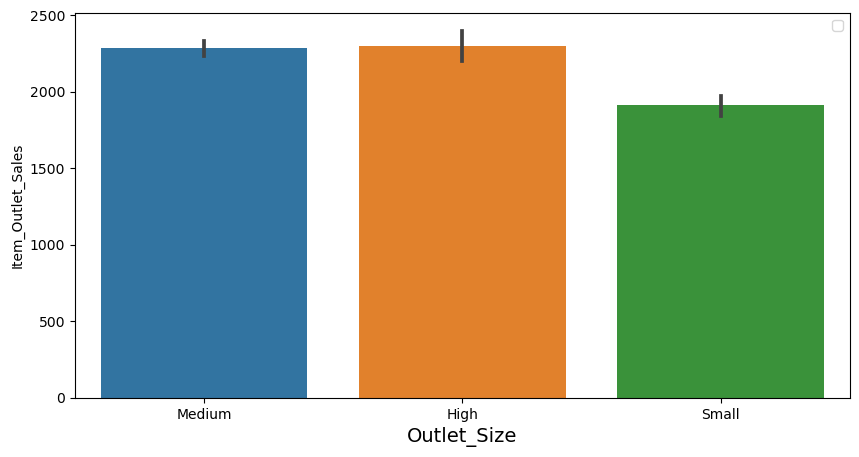

In [168]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=df_train)
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


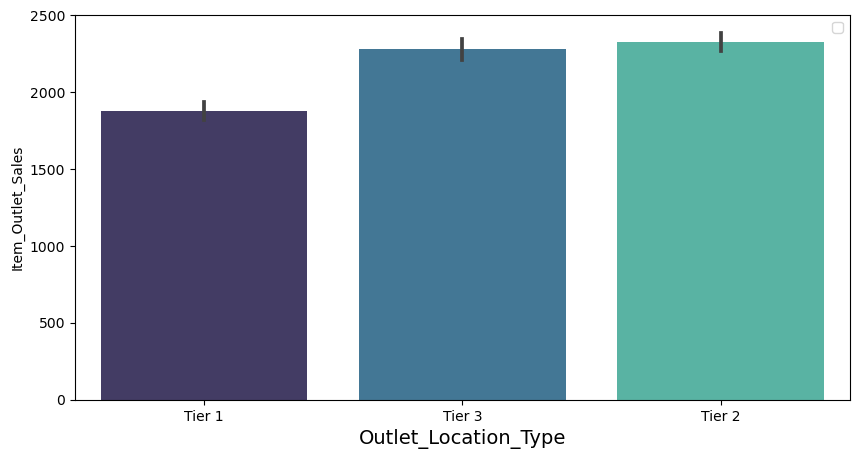

In [169]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=df_train ,palette='mako')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()

In [170]:
#### Correlation matrix

<Axes: >

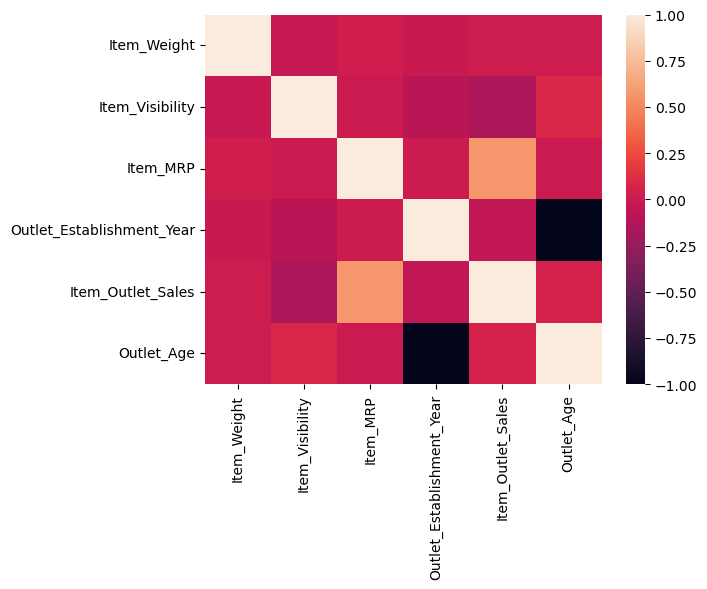

In [171]:
#plotting the correlation matrix
sns.heatmap(df_train.corr() ,cmap='rocket')

In [172]:
###  Item_Outlet_Sales is highly correlated with Item_MRP

In [173]:
##################

### Feature Engineering
Categorical values:

#### Ordinal
Item_Fat_Content
Outlet_Size
Outlet_Location_Type

#### Nominal 

Item_Identifier
Item_Type
Outlet_Identifier
Outlet_Type
Numeric values:

From the numeric variables Outlet_Establishment_Year is no longer needed

Conclusion:

The columns Outlet_Establishment_Year, Item_Identifier and Outlet_Identifier don't have significant values so we will drop them.
All Ordinal variables will be Label encoded.
The columns Outlet_Type and Item_Type will be One Hot encoded.

### Machine Learning

In [174]:
#Label Encoding train

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [175]:
df_train['Item_Fat_Content']= le.fit_transform(df_train['Item_Fat_Content'])
df_train['Outlet_Size']= le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']= le.fit_transform(df_train['Outlet_Location_Type'])

In [176]:
# Encoding test

df_test['Item_Fat_Content']= le.fit_transform(df_test['Item_Fat_Content'])
df_test['Outlet_Size']= le.fit_transform(df_test['Outlet_Size'])
df_test['Outlet_Location_Type']= le.fit_transform(df_test['Outlet_Location_Type'])

In [177]:
from sklearn.preprocessing import OneHotEncoder

In [203]:
sales_train = df_train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis = 1)
sales_test = df_test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis = 1)
#Encoding train

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['Item_Fat_Content']= le.fit_transform(df_train['Item_Fat_Content'])
df_train['Outlet_Size']= le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']= le.fit_transform(df_train['Outlet_Location_Type'])
# Encoding test

df_test['Item_Fat_Content']= le.fit_transform(df_test['Item_Fat_Content'])
df_test['Outlet_Size']= le.fit_transform(df_test['Outlet_Size'])
df_test['Outlet_Location_Type']= le.fit_transform(df_test['Outlet_Location_Type'])

In [237]:
##one hot encoding

# Select the categorical columns for one-hot encoding
categorical_columns = ['Item_Type','Outlet_Type']

# Perform one-hot encoding#
encoded_data = pd.get_dummies(df_train, columns=categorical_columns, drop_first = True)


In [205]:
##Spliting data by train_test_split
x=sales_train.drop('Item_Outlet_Sales',axis=1)
y=sales_train['Item_Outlet_Sales']

##Scaling Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [206]:
def cross_val(model_name,model,x,y,cv):

    scores = CVS(model, x, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

In [224]:
###Model Training and Testing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRFRegressor
lr=LinearRegression()

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

xgb = XGBRFRegressor()

In [238]:
#linear regression

lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

lr_mae = MAE(y_test,y_pred)
lr_mse = MSE(y_test,y_pred)
lr_cvs  = round(CVS(lr, x, y, cv=5).mean(),4)
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred)
r1

print(f" Mean Absolute Error: {lr_mae}\n")
print(f" Mean Squared Error: {lr_mse}\n")
print(f" R^2 Score: {r1}\n")

 Mean Absolute Error: 913.1483657148178

 Mean Squared Error: 1430245.406983962

 R^2 Score: 0.5113378588800128



In [215]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Linear_Regression.to_csv("Linear Regression.csv")

In [239]:
#RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
rf_mae = MAE(y_test,y_pred)
rf_mse = MSE(y_test,y_pred)
rf_cvs  = round(CVS(rf, x, y, cv=5).mean(),4)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2


print(f" Mean Absolute Error: {rf_mae}\n")
print(f" Mean Squared Error: {rf_mse}\n")
print(f" R^2 Score: {r2}\n")

 Mean Absolute Error: 778.6008836418308

 Mean Squared Error: 1202093.479733237

 R^2 Score: 0.5892889634433158



In [226]:
Randomforestregressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Randomforestregressor.to_csv("Randomforestregressor.csv")

In [240]:
#AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=50, learning_rate =.01)
ada.fit(x_train,y_train)

y_pred = ada.predict(x_test)
ada_mae = MAE(y_test,y_pred)
ada_mse = MSE(y_test,y_pred)
ada_cvs  = round(CVS(ada, x, y, cv=5).mean(),4)
from sklearn.metrics import r2_score
r3 = r2_score(y_test,y_pred)
r3

print(f" Mean Absolute Error: {ada_mae}\n")
print(f" Mean Squared Error: {ada_mse}\n")
print(f" R^2 Score: {r3}\n")

 Mean Absolute Error: 835.9589701050215

 Mean Squared Error: 1364799.4993828144

 R^2 Score: 0.5336983133724748



In [222]:
Adaboosting=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Adaboosting.to_csv("Ada boosting.csv")

In [242]:
xgb = XGBRFRegressor()
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)
xgb_mae = MAE(y_test,y_pred)
xgb_mse = MSE(y_test,y_pred)
ada_cvs  = round(CVS(xgb, x, y, cv=5).mean(),4)
from sklearn.metrics import r2_score
r4 = r2_score(y_test,y_pred)
r4

print(f" Mean Absolute Error: {ada_mae}\n")
print(f" Mean Squared Error: {ada_mse}\n")
print(f" R^2 Score: {r4}\n")

 Mean Absolute Error: 835.9589701050215

 Mean Squared Error: 1364799.4993828144

 R^2 Score: 0.5936785409745994



In [229]:
xgboosting=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
xgboosting.to_csv("xgboosting.csv")

In [243]:
#GradientBoostingRegressor

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
gbr.fit(x_train,y_train)

y_pred = gbr.predict(x_test)
gbr_mae = MAE(y_test,y_pred)
gbr_mse = MSE(y_test,y_pred)
ada_cvs  = round(CVS(gbr, x, y, cv=5).mean(),4)
from sklearn.metrics import r2_score
r5 = r2_score(y_test,y_pred)
r5

print(f" Mean Absolute Error: {ada_mae}\n")
print(f" Mean Squared Error: {ada_mse}\n")
print(f" R^2 Score: {r5}\n")

 Mean Absolute Error: 835.9589701050215

 Mean Squared Error: 1364799.4993828144

 R^2 Score: 0.5921719839186701



In [231]:
GradientBoosting=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
GradientBoosting.to_csv("GradientBoosting.csv")

In [241]:
LS = Lasso()

LS.fit(x_train,y_train)

#predict
y_predict = LS.predict(x_test)

#score variables
LS_MAE = MAE(y_test, y_predict)
LS_MSE = MSE(y_test, y_predict)
r6 = r2_score(y_test, y_predict)
LS_CS  = round(CVS(LS, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {r6}\n")

 Mean Absolute Error: 912.9852322990381

 Mean Squared Error: 1430102.7843674792

 R^2 Score: 0.5113865877714341



In [235]:
Lasso_reg=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Lasso_reg.to_csv("Lasso_reg.csv")

### Final Model

In [236]:
#Model Results

metric_results= {'Model': ['linear Regression', 'RandomForest','AdaBoost','XGb','GradientBoosting','Lasso'],'R Square': [r1,r2,r3,r4,r5,r6]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R Square
0,linear Regression,0.511338
1,RandomForest,0.589289
2,AdaBoost,0.538172
3,XGb,0.593679
4,GradientBoosting,0.592172
5,Lasso,0.511387


#### XGboosting and GradientBoosting have the best perfomance in most categories.